In [2]:
''' Write a Python program to simulate the following scenarios:
  a. Tossing a coin 10,000 times and calculating the experimental probability of heads and tails.'''


import random

n = int(input("Enter the number of times you want to toss the coin: "))
observation_list = []
total_possiblity = n

for i in range(n):
  observation_list.append(random.choice(['H','T']))

print(f"observation_list : {observation_list}")
print(f"total_possiblity: {total_possiblity}")
print(f"Probeblity of head : {observation_list.count('H')/total_possiblity}")
print(f"Probeblity of tail : {observation_list.count('T')/total_possiblity}")

Enter the number of times you want to toss the coin: 5
observation_list : ['H', 'T', 'T', 'H', 'T']
total_possiblity: 5
Probeblity of head : 0.4
Probeblity of tail : 0.6


In [3]:
'''b. Rolling two dice and computing the probability of getting a sum of 7.  '''
d1 =[1,2,3,4,5,6]
d2 =[1,2,3,4,5,6]

n = int(input("Enter the number of times you want to roll the dice: "))
observation_list = []
total_possiblity = n

for i in range(n):
  if random.choice(d1)+random.choice(d2) == 7:
    observation_list.append(1)
  else:
    observation_list.append(random.choice(d1)+random.choice(d2))

print(f"observation_list : {observation_list}")
print(f"total_possiblity: {total_possiblity}")
print(f"Probeblity of getting 7 : {observation_list.count(7)/total_possiblity}")

Enter the number of times you want to roll the dice: 5
observation_list : [7, 1, 5, 9, 3]
total_possiblity: 5
Probeblity of getting 7 : 0.2


In [4]:
'''Write a function to estimate the probability of getting at least one "6" in 10 rolls of a fair die.'''
'''solving with classsical approch'''
def prob_6(n):
    total_possibility = 6**n
    no_six_possibility = 5**n
    favorable = total_possibility - no_six_possibility
    probability = favorable / total_possibility
    return round(probability, 4)

n = int(input("Enter the number of rolls: "))
print("Probability of getting at least one '6':", prob_6(n))

Enter the number of rolls: 5
Probability of getting at least one '6': 0.5981


In [5]:
'''Conditional Probability and Bayes' Theorem


3. A bag contains 5 red, 7 green, and 8 blue balls. A ball is drawn randomly, its color noted, and it is put back into the bag. If this process is repeated 1000 times, write a Python program to estimate:
  a. The probability of drawing a red ball given that the previous ball was blue.
  b. Verify Bayes' theorem with the simulation results. '''

r = ["red" for i in range(5)]
g = ["green" for i in range(7)]
b = ["blue" for i in range(8)]

total_ball = r+g+b

observation_list = []

for i in range(1000):
  observe = []
  observe.append(random.choice(total_ball))
  observe.append(random.choice(total_ball))
  observation_list.append(observe)

count_prev_blue = 0
count_prev_blue_and_red = 0

count_red = 0
count_red_and_prev_blue = 0

count_blue = 0

for pair in observation_list:
    prev, curr = pair[0], pair[1]

    if prev == "blue":
        count_prev_blue += 1
        if curr == "red":
            count_prev_blue_and_red += 1

    if curr == "red":
        count_red += 1
        if prev == "blue":
            count_red_and_prev_blue += 1

    if curr == "blue":
        count_blue += 1

P_red_given_blue = count_prev_blue_and_red / count_prev_blue if count_prev_blue else 0
P_blue_given_red = count_red_and_prev_blue / count_red if count_red else 0
P_red = count_red / len(observation_list)
P_blue = count_blue / len(observation_list)

bayes = (P_blue_given_red * P_red) / P_blue if P_blue else 0

print(f"\nTotal observations: {len(observation_list)}")
print(f"P(Red | Previous was Blue): {P_red_given_blue:}")
print(f"Bayes' Theorem RHS (P(R|B) = P(B|R)*P(R)/P(B)): {bayes:}")




Total observations: 1000
P(Red | Previous was Blue): 0.2722772277227723
Bayes' Theorem RHS (P(R|B) = P(B|R)*P(R)/P(B)): 0.2887139107611549


In [6]:
'''Random Variables and Discrete Probability


4. Generate a sample of size 1000 from a discrete random variable with the following distribution:
  - P(X=1) = 0.25
  - P(X=2) = 0.35
  - P(X=3) = 0.4
  Compute the empirical mean, variance, and standard deviation of the sample.  '''
import numpy as np

output_list = []

for i in range(1000):
  output_list.append(np.random.choice([1,2,3],p = [0.25,0.35,0.4]))


data1 = np.array(output_list)
print(f"Mean:{data1.mean()}")
print(f"Variance:{data1.var()}")
print(f"standard deviation:{data1.std()}")

Mean:2.157
Variance:0.670351
standard deviation:0.8187496564884775


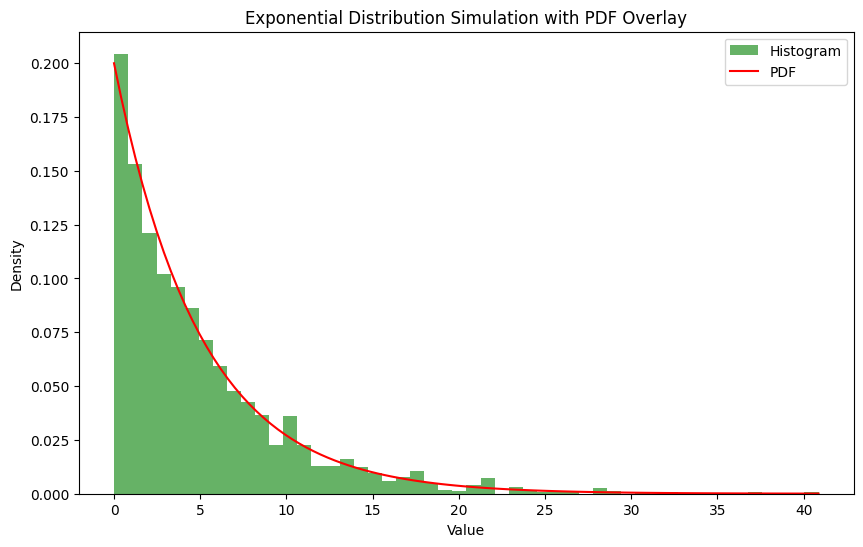

In [7]:
'''5. Simulate 2000 random samples from an exponential distribution with a mean of 5. Visualize the distribution using:
  a. A histogram.
  b. A probability density function (PDF) overlay.
  Steps
      a. Use numpy.random.exponential().
      b. Use matplotlib to create visualizations.'''
import matplotlib.pyplot as plt
from scipy.stats import expon

%matplotlib inline
np.random.seed(42)
data2 = np.random.exponential(5,2000)
plt.figure(figsize=(10, 6))

plt.hist(data2, bins=50, density=True, alpha=0.6, color='g', label='Histogram')

x = np.linspace(0, max(data2), 100)
lambda_val = 1/5
pdf = expon.pdf(x, scale=5)
plt.plot(x, pdf, 'r-', label='PDF')


plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Exponential Distribution Simulation with PDF Overlay')
plt.legend()
plt.show()

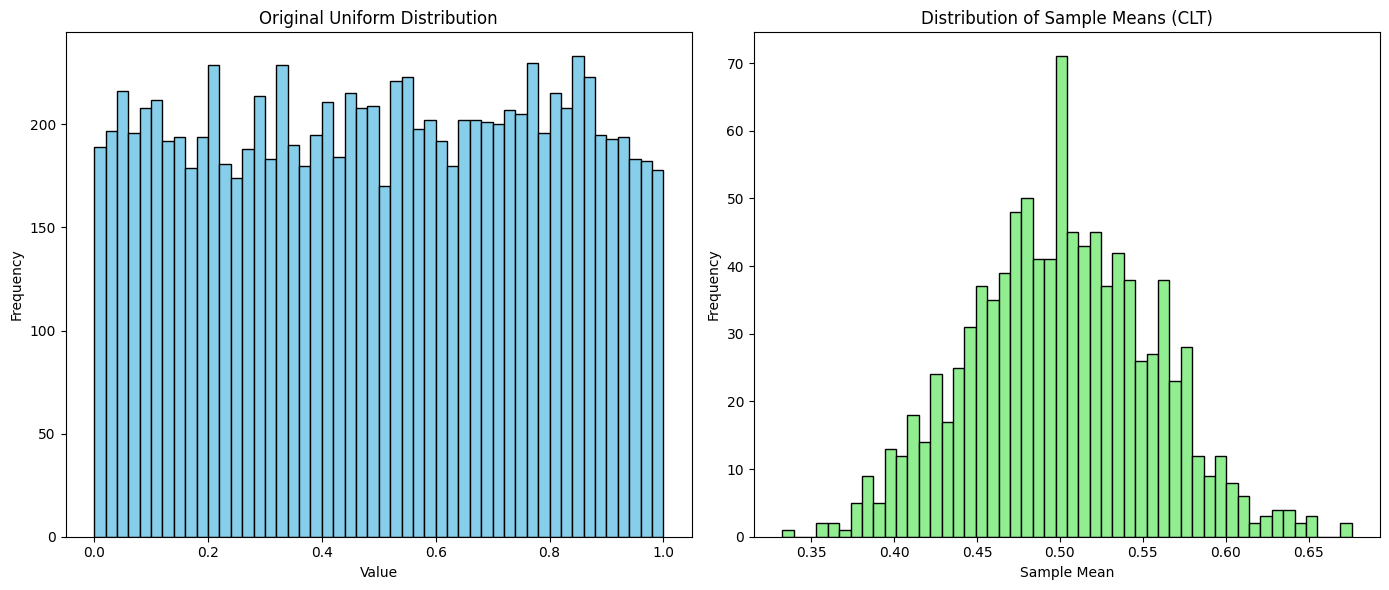

In [24]:
'''Central Limit Theorem


6. Simulate the Central Limit Theorem by following these steps
  a. Generate 10,000 random numbers from a uniform distribution.
  b. Draw 1000 samples of size n = 30.
  c. Calculate and visualize the distribution of sample means.
  Steps
      a. Use numpy.random.uniform().
      b. Plot both the uniform distribution and the sample mean distribution for comparison.'''

%matplotlib inline

population = []
for i in range(10000):
    population.append(np.random.uniform())

sample_list = []
for i in range(1000):
    sample = np.random.choice(population, 30, replace=False)
    sample_list.append(np.mean(sample))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(population, bins=50, color='skyblue', edgecolor='black')
plt.title('Original Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(sample_list, bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Sample Means (CLT)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()